In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [10]:
pd.options.display.float_format = '{:20.2f}'.format
pd.set_option('display.max_columns', 999)

In [49]:
data=pd.read_csv(r'C:\Users\Acer\Desktop\online retail clustering\data\routine_rhythms_2024_final_clean.csv')
data.head(3)

,user_id,date,weekday,is_weekend,screen_time_hrs,steps,unlock_count,work_app_hrs,social_app_hrs,ent_app_hrs,archetype_ground_truth,is_anomaly_ground_truth
0,0,2024-01-01,Monday,0,9.28,4011,56,6.70,0.34,1.33,Workaholic,0
1,0,2024-01-02,Tuesday,0,8.69,3243,47,4.91,2.49,1.29,Workaholic,0
2,0,2024-01-03,Wednesday,0,8.88,4074,85,5.95,1.80,0.92,Workaholic,0


In [50]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54900 entries, 0 to 54899
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  54900 non-null  int64  
 1   date                     54900 non-null  object 
 2   weekday                  54900 non-null  object 
 3   is_weekend               54900 non-null  int64  
 4   screen_time_hrs          54900 non-null  float64
 5   steps                    54900 non-null  int64  
 6   unlock_count             54900 non-null  int64  
 7   work_app_hrs             54900 non-null  float64
 8   social_app_hrs           54900 non-null  float64
 9   ent_app_hrs              54900 non-null  float64
 10  archetype_ground_truth   54900 non-null  object 
 11  is_anomaly_ground_truth  54900 non-null  int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 5.0+ MB
None


In [51]:
data["date"] = pd.to_datetime(data["date"])
data.user_id.value_counts()

user_id
0      366
1      366
2      366
3      366
4      366
      ... 
145    366
146    366
147    366
148    366
149    366
Name: count, Length: 150, dtype: int64

In [52]:
data.describe(exclude='object')

,user_id,date,is_weekend,screen_time_hrs,steps,unlock_count,work_app_hrs,social_app_hrs,ent_app_hrs,is_anomaly_ground_truth
count,54900.00,54900,54900.00,54900.00,54900.00,54900.00,54900.00,54900.00,54900.00,54900.00
mean,74.50,2024-07-01 12:00:00,0.28,8.91,6081.16,95.15,2.95,2.37,2.79,0.02
min,0.00,2024-01-01 00:00:00,0.00,0.00,0.00,13.00,0.00,0.00,0.00,0.00
25%,37.00,2024-04-01 00:00:00,0.00,7.24,3522.75,75.00,1.67,1.42,1.44,0.00
50%,74.50,2024-07-01 12:00:00,0.00,8.55,5920.00,91.00,2.66,2.31,2.18,0.00
75%,112.00,2024-10-01 00:00:00,1.00,10.39,8721.25,116.00,4.08,3.30,4.00,0.00
max,149.00,2024-12-31 00:00:00,1.00,18.17,13176.00,174.00,9.62,6.94,8.67,1.00
std,43.30,NaN,0.45,2.34,2797.84,25.11,1.73,1.25,1.83,0.14


In [53]:
data[data[["work_app_hrs","social_app_hrs","ent_app_hrs"]].sum(axis=1)>24] #no such rows

,user_id,date,weekday,is_weekend,screen_time_hrs,steps,unlock_count,work_app_hrs,social_app_hrs,ent_app_hrs,archetype_ground_truth,is_anomaly_ground_truth


In [56]:
data[data[["work_app_hrs","social_app_hrs","ent_app_hrs"]].sum(axis=1)>data["screen_time_hrs"]] #inconsistent due to float precision

,user_id,date,weekday,is_weekend,screen_time_hrs,steps,unlock_count,work_app_hrs,social_app_hrs,ent_app_hrs,archetype_ground_truth,is_anomaly_ground_truth
10,0,2024-01-11,Thursday,0,10.22,3309,56,6.91,1.66,1.65,Workaholic,0
21,0,2024-01-22,Monday,0,6.03,4244,59,4.59,0.02,1.42,Workaholic,0
23,0,2024-01-24,Wednesday,0,7.60,4552,62,5.13,1.86,0.60,Workaholic,0
33,0,2024-02-03,Saturday,1,7.63,5548,85,1.33,2.49,3.82,Workaholic,0
52,0,2024-02-22,Thursday,0,5.27,4003,71,3.41,0.82,1.03,Workaholic,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54853,149,2024-11-15,Friday,0,6.31,9473,64,2.50,1.39,2.42,Early Bird,0
54875,149,2024-12-07,Saturday,1,7.12,9836,83,2.23,2.71,2.18,Early Bird,0
54888,149,2024-12-20,Friday,0,5.03,10648,72,2.45,1.23,1.34,Early Bird,0
54897,149,2024-12-29,Sunday,1,7.09,10610,71,2.08,2.81,2.20,Early Bird,0


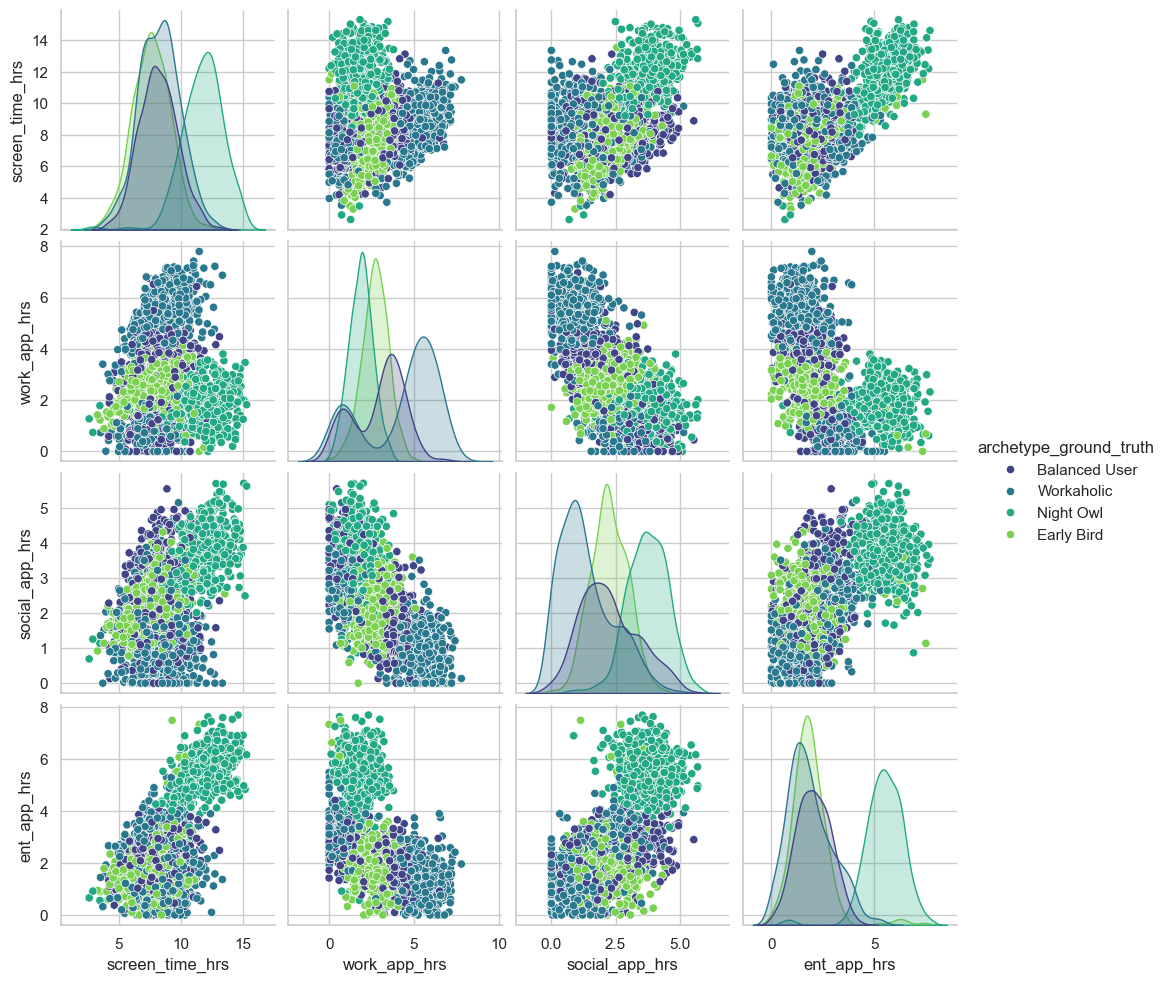

In [67]:
sns.pairplot(data[["screen_time_hrs","work_app_hrs","social_app_hrs","ent_app_hrs",'archetype_ground_truth']].sample(2000), diag_kind='kde',hue='archetype_ground_truth', palette='viridis')